Hierarchical clustering seeks to build a hierarchy of clusters. <br/>
## Agglormerative Clustering
Pairs of clusters are merged together <br/>
The goal of agglormerative is to get the points into one final cluster. <br/>
## Divisive Clustering
Start from a single cluster and splits are performed recursively. <br/>
It is pretty much opposite from agglormerative clustering. We start with one and end with multiple.<br/>
<br/>

## Types of Agglormerative Clustering
A distance metric is used to identify how close or far the clusters are. <br/>
### Complete linkage clustering
We make the clusters normally, most likely by choosing points that are closest\
**Note: To form the clusters, we look at the closest distance**\
Then, we find the maximum distance between elements of each cluster <br/>
Prone to outliers.

### Single linkage clustering 
Again, we form the clusters by looking at the closest distance between points\
Then, we find the minimum distance between elements of each cluster; opposite from complete linkage. <br/>
Prone to outliers.
### Average linkage clustering
The mean distance between elements of each cluster <br/>
Same as the other ones, but instead of max/min distance, we look at average distance between clusters
### Ward linkage clustering
This one is close to K-Means, but this is more in a hierarchical structure.\
The distance between clusters is the increase in variance that would result in merging them.\
Most preferred, especially with outliers.

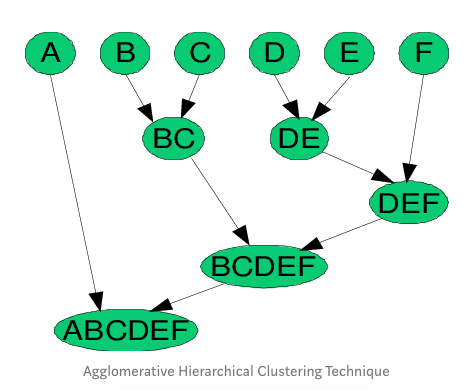

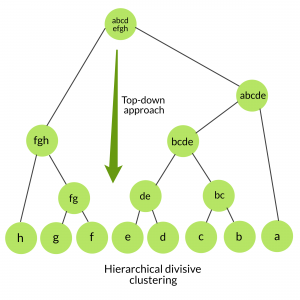

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# This lets us use Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering
# Using distance metrics, we have to standardize our data.
from sklearn.preprocessing import RobustScaler
# Cannot visualize anything other than 2D, so we will use PCA.
from sklearn.decomposition import PCA
# Tells us how strong a particular cluster is. Range is -1 to 1. We assume the clusters are convex in shape (Convex as in geometry, remember mathnasium)
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc

In [8]:
df = pd.read_csv('/Users/cwbenton/STAT-4140/datasets/CC GENERAL.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [10]:
categorical = df.columns[df.dtypes == 'object']
categorical = list(categorical)
continuous = df.columns[df.dtypes != 'object']
continuous = list(continuous)

In [11]:
# We are only working with continuous variables.
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
df_imputed_continuous=imputer.fit_transform(df[continuous])
df_imputed_continuous = pd.DataFrame(df_imputed_continuous)
df_imputed_continuous.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       8950 non-null   float64
 1   1       8950 non-null   float64
 2   2       8950 non-null   float64
 3   3       8950 non-null   float64
 4   4       8950 non-null   float64
 5   5       8950 non-null   float64
 6   6       8950 non-null   float64
 7   7       8950 non-null   float64
 8   8       8950 non-null   float64
 9   9       8950 non-null   float64
 10  10      8950 non-null   float64
 11  11      8950 non-null   float64
 12  12      8950 non-null   float64
 13  13      8950 non-null   float64
 14  14      8950 non-null   float64
 15  15      8950 non-null   float64
 16  16      8950 non-null   float64
dtypes: float64(17)
memory usage: 1.2 MB


In [12]:
df_imputed_continuous.columns = continuous
df_imputed_continuous

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12.0
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1.0,1.0,7500.0,0.000000,312.343947,0.000000,12.0
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0.0,6.0,1000.0,325.594462,48.886365,0.500000,6.0
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0.0,6.0,1000.0,275.861322,312.343947,0.000000,6.0
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0.0,5.0,1000.0,81.270775,82.418369,0.250000,6.0
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2.0,0.0,500.0,52.549959,55.755628,0.250000,6.0


In [13]:
# Scale the continuous variables. We HAVE to do this.
scaler = RobustScaler()
scaled_data=scaler.fit_transform(df_imputed_continuous)
scaled_data

array([[-0.43226678, -1.63636364, -0.24837108, ..., -0.27973218,
         0.        ,  0.        ],
       [ 1.20937371, -0.81818182, -0.33748873, ...,  1.23005435,
         1.55555556,  0.        ],
       [ 0.84209923,  0.        ,  0.38476593, ...,  0.50973191,
         0.        ,  0.        ],
       ...,
       [-0.44135471, -1.5000045 , -0.20259786, ..., -0.37213466,
         1.75000175, -6.        ],
       [-0.44651662, -1.5000045 , -0.33748873, ..., -0.41528832,
         1.75000175, -6.        ],
       [-0.25997614, -3.        ,  0.68376779, ..., -0.36263312,
         0.        , -6.        ]])

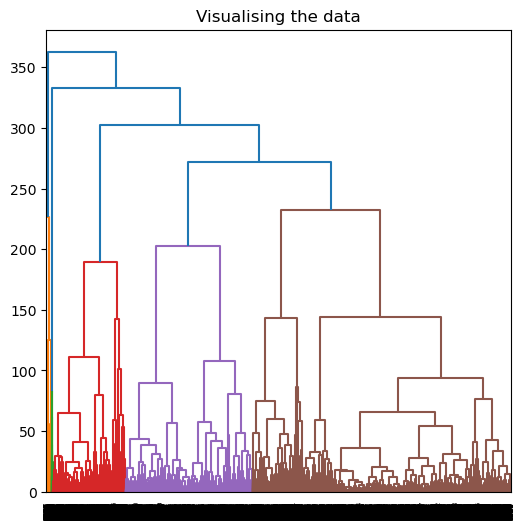

In [14]:
plt.figure(figsize =(6, 6)) 
plt.title('Visualising the data') 
Dendrogram = shc.dendrogram((shc.linkage(scaled_data, method ='ward')))

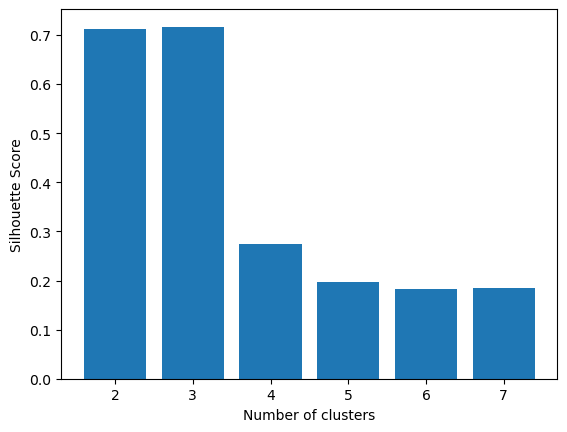

In [15]:
# How many clusters are ideal for my hierarchical clustering?
silhouette_scores = [] 

for n_cluster in range(2, 8):
    silhouette_scores.append( 
        silhouette_score(scaled_data, AgglomerativeClustering(n_clusters = n_cluster).fit_predict(scaled_data))) 
    
k = [2, 3, 4, 5, 6,7] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show()

Looking at the above graph, we see that when we increase the number of clusters, the score starts to go down. The number of clusters should be 2 or 3.

In [16]:
# What if we wanted to use PCA to reduce the dimensionality?
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(scaled_data) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 
  
X_principal.head(2)

,P1,P2
0,-2.587907,0.074176
1,-0.227674,1.786421


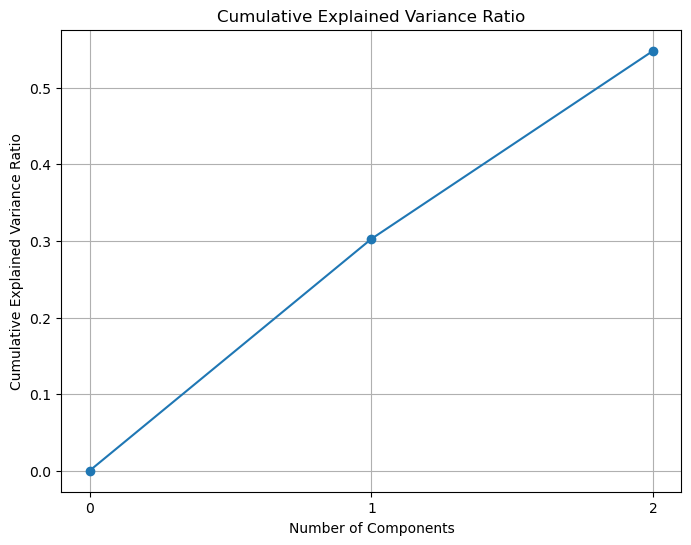

In [17]:
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
cumulative_variance_ratio = np.insert(cumulative_variance_ratio, 0, 0)
plt.figure(figsize=(8, 6))
plt.plot(range(0, len(cumulative_variance_ratio)), cumulative_variance_ratio, marker='o', linestyle='-')
plt.title('Cumulative Explained Variance Ratio')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.xticks(np.arange(0, len(cumulative_variance_ratio)))
plt.grid(True)
plt.show()

In the above figure, we can see that only about 50% of the variance is retained, which is not completely representative of our original features.

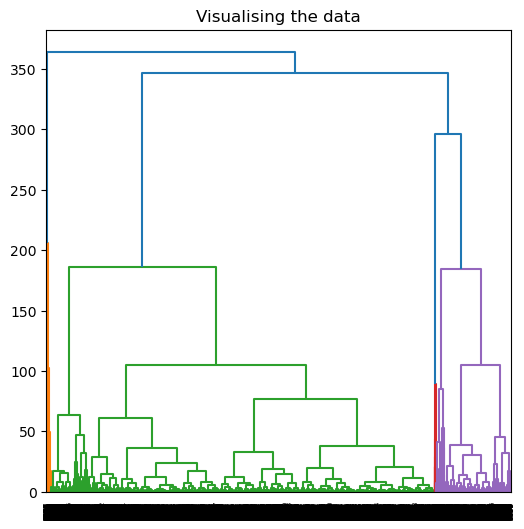

In [18]:
plt.figure(figsize =(6, 6)) 
plt.title('Visualising the data') 
Dendrogram = shc.dendrogram((shc.linkage(X_principal, method ='ward')))

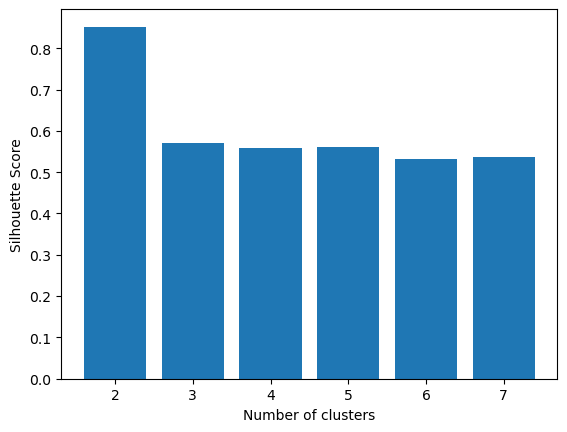

In [19]:
silhouette_scores = [] 

for n_cluster in range(2, 8):
    silhouette_scores.append( 
        silhouette_score(X_principal, AgglomerativeClustering(n_clusters = n_cluster).fit_predict(X_principal))) 
    

k = [2, 3, 4, 5, 6,7] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show()

Using PCA, we see that we should use 2 clusters.

In [20]:
agg = AgglomerativeClustering(n_clusters=2)
agg.fit(X_principal)

AgglomerativeClustering()

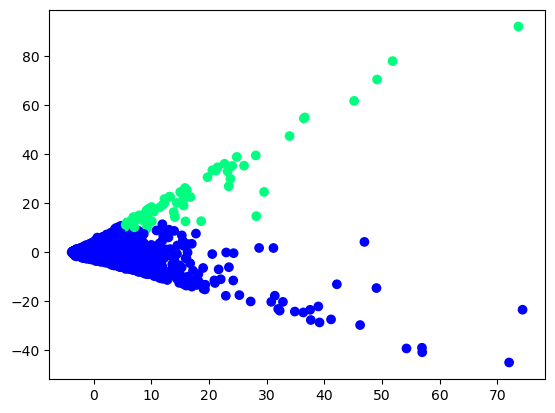

In [21]:
plt.scatter(X_principal['P1'], X_principal['P2'],  
           c = AgglomerativeClustering(n_clusters = 2).fit_predict(X_principal), cmap =plt.cm.winter) 
plt.show() 

Here are the 2 clusters using PCA. We can see that both of the clusters are convex in shape.